# Jupyter Notebook to develop a Model for accurate prediction of Heart Diseases through Machine Learning Algorithms

# In our analysis, we will use three Machine Learning Algorithms: Logistic Regression, Random Forest, Support Vector Machines.

In [1]:
#Importing important modules and library to perform our Data Analysis and Machine Learning Algorithms 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os

In [2]:
#Importing the Dataset which is stored in a Comma Seperated Values (CSV) File which will be utilized for the Data Analysis
dataset = pd.read_csv(r'C:\Users\My PC\Desktop\Medical\heart.csv')

# Pre-Emptive Data Analysis

In [3]:
#The Data will be pre-emptively analyzed to make the best out of it and help us understand the best fit for the algorithms

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
"""

What do these columns mean? 

From the avaliable medical records, we have inferred the following about our Dataset: 

1. Age: The age of a person in years
2. Sex: Whether a person is male or female where 1 is used to depict the Male while 0 for Female 
3. CP: The Chest Pain Type of the Person. It can be Typical Angina, Atypical Angina, Non-Anginal Pain, Asympotmatic Pain and are
       depicted in their respective numbers i.e 1-4.
4. trestbps: The Resting Blood Pressure of the Person
5. chol: The Cholestrol Level of the Person which has been measured in mg/dl
6. fbs: The fasting blood sugar
7. restecg: It is used to depict whether the electrocardiograph results in values 0, 1 & 2
8. thalach: What is the maximum heart rate achieved?
9. exang: It is exercise induced angina which is either 0 or 1
10. oldpeak: It denotes the depression caused by exercise which is relative to rest
11. slope: Slope of Peak Exercise
12. ca: Using values from 0 to 3 it shows the primary vessels 
13. thal: Depicts inherited blood disorder

"""

'\n\nWhat do these columns mean? \n\nFrom the avaliable medical records, we have inferred the following about our Dataset: \n\n1. Age: The age of a person in years\n2. Sex: Whether a person is male or female where 1 is used to depict the Male while 0 for Female \n3. CP: The Chest Pain Type of the Person. It can be Typical Angina, Atypical Angina, Non-Anginal Pain, Asympotmatic Pain and are\n       depicted in their respective numbers i.e 1-4.\n4. trestbps: The Resting Blood Pressure of the Person\n5. chol: The Cholestrol Level of the Person which has been measured in mg/dl\n6. fbs: The fasting blood sugar\n7. restecg: It is used to depict whether the electrocardiograph results in values 0, 1 & 2\n8. thalach: What is the maximum heart rate achieved?\n9. exang: It is exercise induced angina which is either 0 or 1\n10. oldpeak: It denotes the depression caused by exercise which is relative to rest\n11. slope: Slope of Peak Exercise\n12. ca: Using values from 0 to 3 it shows the primary ve

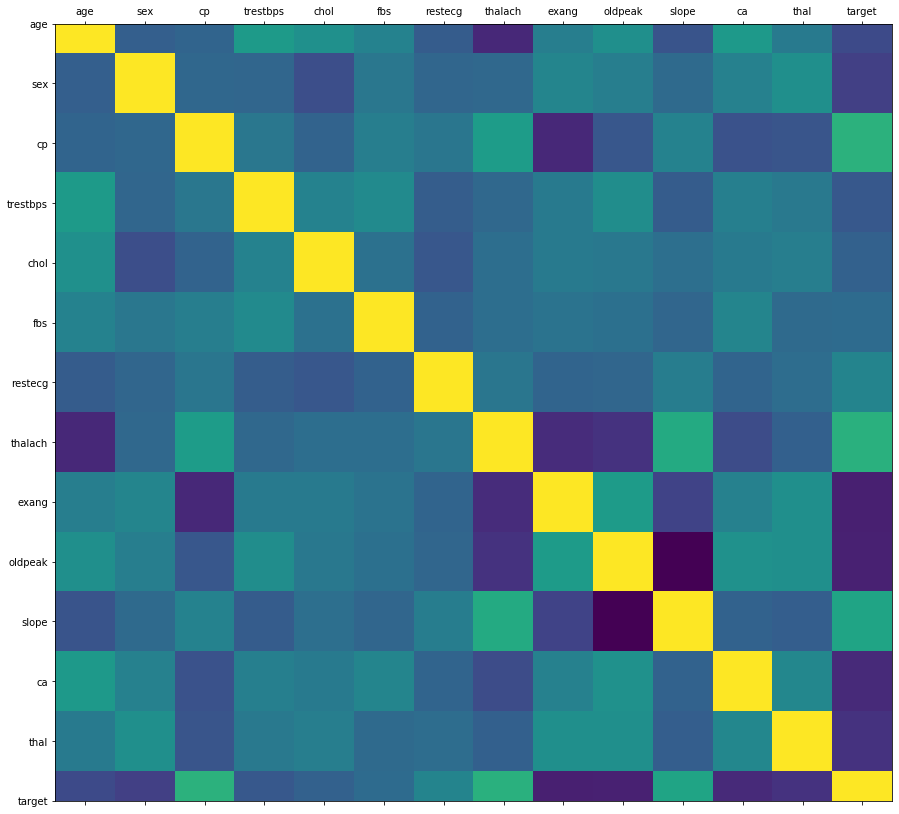

In [7]:
# Showing a Co-Relation between the different Data given on our Dataframe

def plot_it(dataframe, size=15):
    corr = dataframe.corr()    # A Dataframe Co-Relation Function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # Color Codes the recangle according to their value
    plt.xticks(range(len(corr.columns)), corr.columns)  
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_it(dataset)

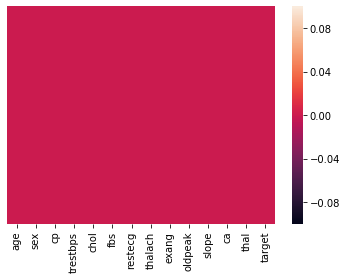

In [31]:
#Generating a Heatmap for our Dataset

sns.heatmap(dataset.isnull(),yticklabels=False)

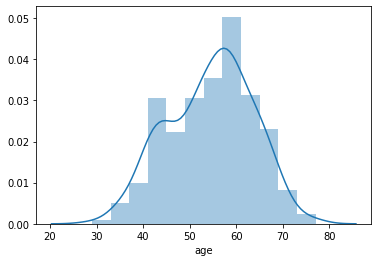

In [33]:
#What is the age of our patients? Let's find out

sns.distplot(dataset["age"])

In [8]:
print('Columns of our Dataset: \n',dataset.columns)

Columns of our Dataset: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [9]:
print('Unique Column Count: \n')
for col in dataset:
    print(len(dataset[col].unique()), col)

Unique Column Count: 

41 age
2 sex
4 cp
49 trestbps
152 chol
2 fbs
3 restecg
91 thalach
2 exang
40 oldpeak
3 slope
5 ca
4 thal
2 target


In [10]:
dataset.shape

(303, 14)

In [11]:
dataset.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      1

In [12]:
dataset.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139

In [13]:
dataset.isnull().values.any()

False

In [14]:
#Thank God, that there is no Null Value in our Dataset. Helps with our Data Analysis!

In [15]:
#Now, let's analyze our Target Value. 1 and 0 are used to show if a patient, has Chest Pain or does not have Chest Pain. 
#We will analyze this pairing across different attributes and then kick-start our algorithms for Data Processing.

In [17]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [18]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [19]:
#We have now a Classification Problem at our hand and we gotta need to analyze this.
#Why not, we start with visualizing our Target Value with different attributes?

1    165
0    138
Name: target, dtype: int64


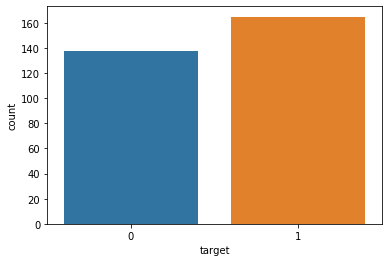

In [20]:
x=dataset["target"]
sns.countplot(x)
our=dataset.target.value_counts()
print(our)

In [21]:
with_disease=round(our[0]*100/303,3)
without_disease=round(our[1]*100/303,3)
print("Percentage of People without Heart Disease: %r" %(with_disease))
print("Percentage of People with Heart Disease: %r" %(without_disease))

Percentage of People without Heart Disease: 45.545
Percentage of People with Heart Disease: 54.455


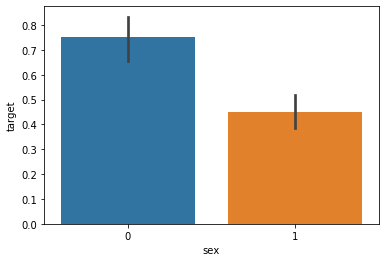

In [22]:
#Lets analyze the Target Feature with Males and Females
sns.barplot(dataset["sex"],x)

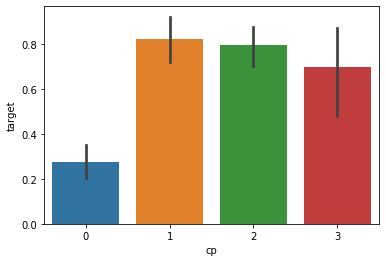

In [23]:
#Lets Analyze the different type of Chest Pains
sns.barplot(dataset["cp"],x)

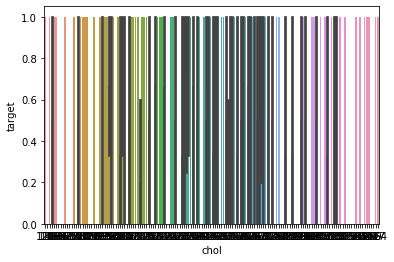

In [24]:
#Lets Analyze the Cholestrol Level 
sns.barplot(dataset["chol"],x)

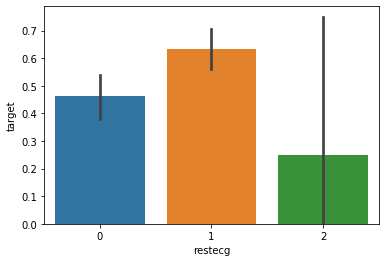

In [25]:
#To messy, isn't it? 
#Lets analyze something more simple. What about the Electro-Cardiograph Data?
sns.barplot(dataset["restecg"],x)

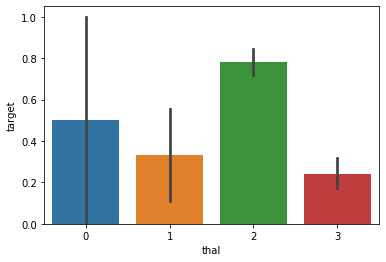

In [26]:
#Lets analyze the Thal 
sns.barplot(dataset["thal"],x)

In [27]:
#Seems like our pre-emtpive Data Analysis is quite over and it was quite fun. Now let's summon the gods of statistics and 
#Machine Learning to build our Models and get our Job done! 

# Summon the Gods

In [28]:
from sklearn.model_selection import train_test_split
to_Predict=dataset.drop("target",axis=1)
to_Target=dataset["target"]

In [29]:
#We will split our Dataset into two parts: 70% Data for Training while the rest 30% Data will be used for testing
X_train,X_test,Y_train,Y_test = train_test_split(to_Predict,to_Target,test_size=0.30,random_state=0)

#Hullo! Our Training and Testing Data is prepared!!

# Algorithms Used: Logistic Regression

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
predicted=logistic_regression.predict(X_test)

###########################################################

final_score=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Logistic Regression is %r" %(final_score))

The accuracy of our model implemented through Logistic Regression is 80.2198


c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Algorithms Used: Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
maxa = 0
for i in range(5000):
    rf = RandomForestClassifier(random_state=i)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,4)
    if(current_accuracy>maxa):
        maxa = current_accuracy
        naruto = x
        
###########################################################


rf = RandomForestClassifier(random_state=naruto)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

In [40]:
final_score1 = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy of our model implemented through Random Forest is %r" %(final_score1))

The accuracy of our model implemented through Random Forest is 91.21


# Algorithms Used: Support Vector Classification

In [41]:
from sklearn import svm
Support_Vector=svm.SVC(kernel="linear")
Support_Vector.fit(X_train,Y_train)
predicted=Support_Vector.predict(X_test)

In [43]:
final_score2=round(accuracy_score(predicted,Y_test)*100,2)
print("The accuracy of our model implemented through Support Vector Classification is %r" %(final_score2))

The accuracy of our model implemented through Support Vector Classification is 81.32


# Final Analysis

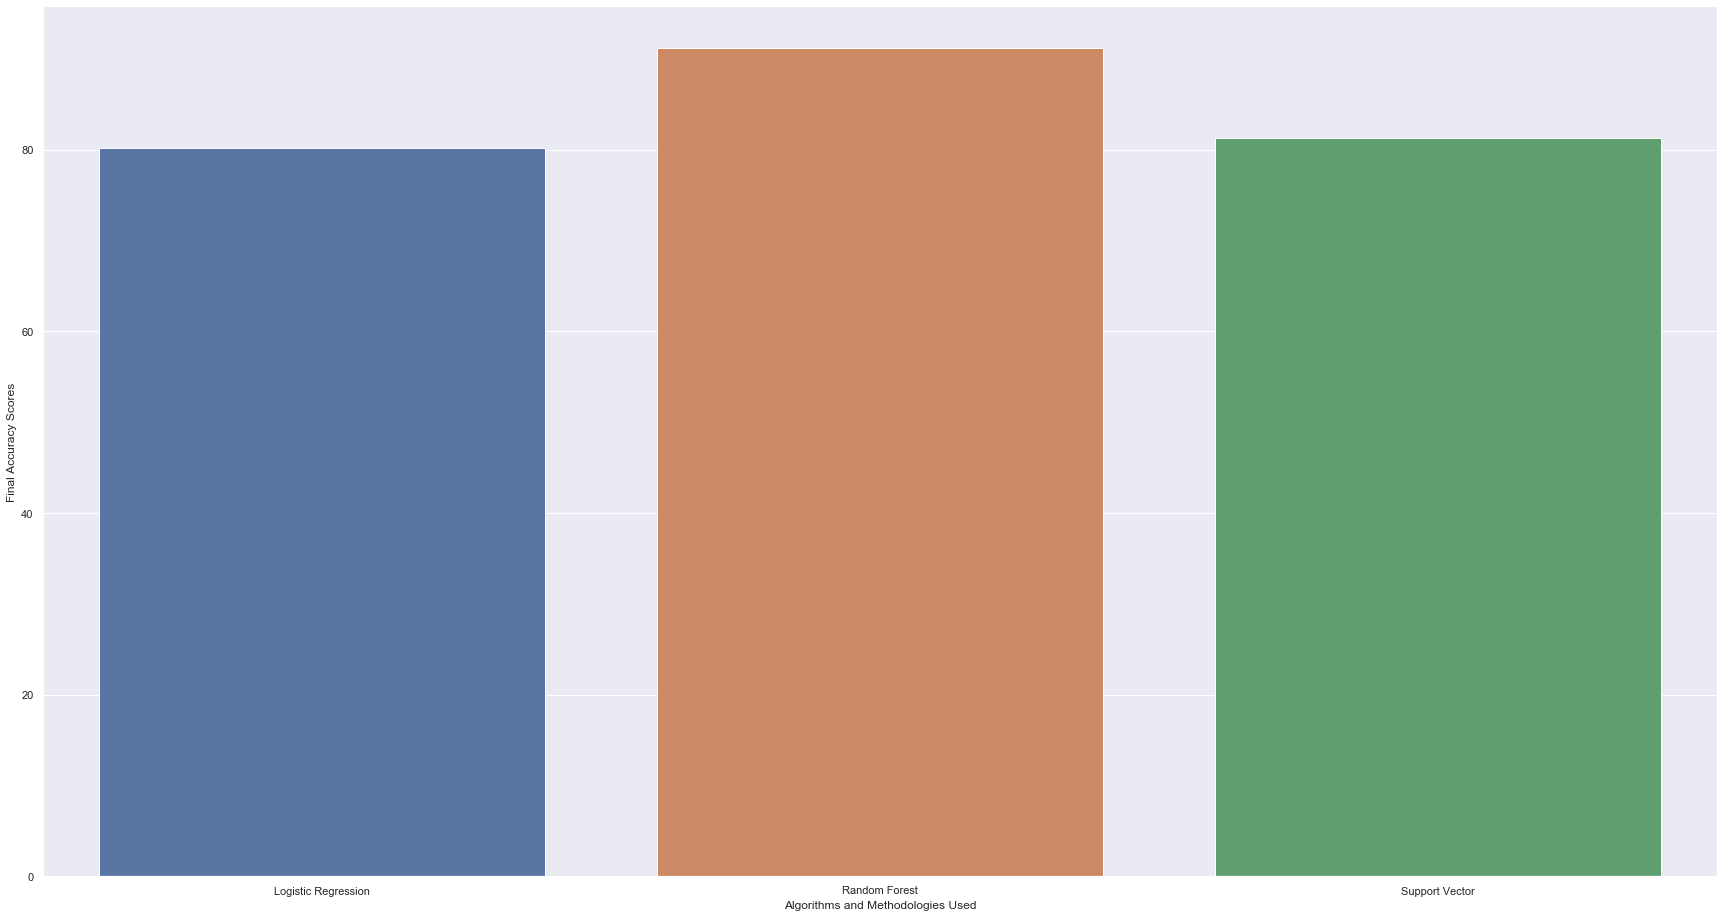

In [44]:
finale=[final_score,final_score1,final_score2]
methods=["Logistic Regression","Random Forest","Support Vector"]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final Accuracy Scores")
sns.barplot(methods,finale)

# 91.21% Accuracy with Random Forest. That's a good model we have implemented.

# Let's print the Confusion Matrix of each of our algorithms

In [48]:
from sklearn.metrics import confusion_matrix
hinata=logistic_regression.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

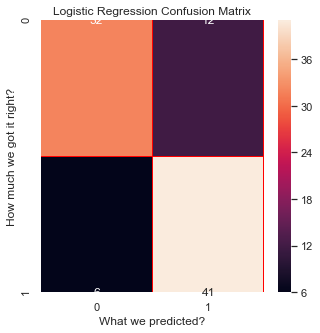

In [50]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [51]:
hinata=rf.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

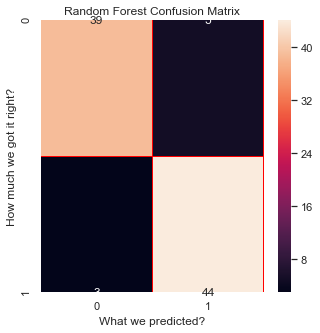

In [52]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [53]:
hinata=Support_Vector.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

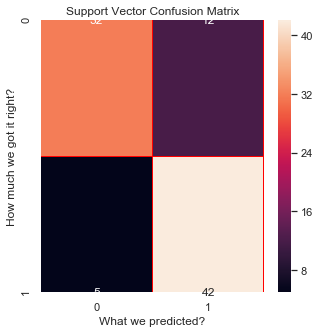

In [54]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Support Vector Confusion Matrix")
plt.show()

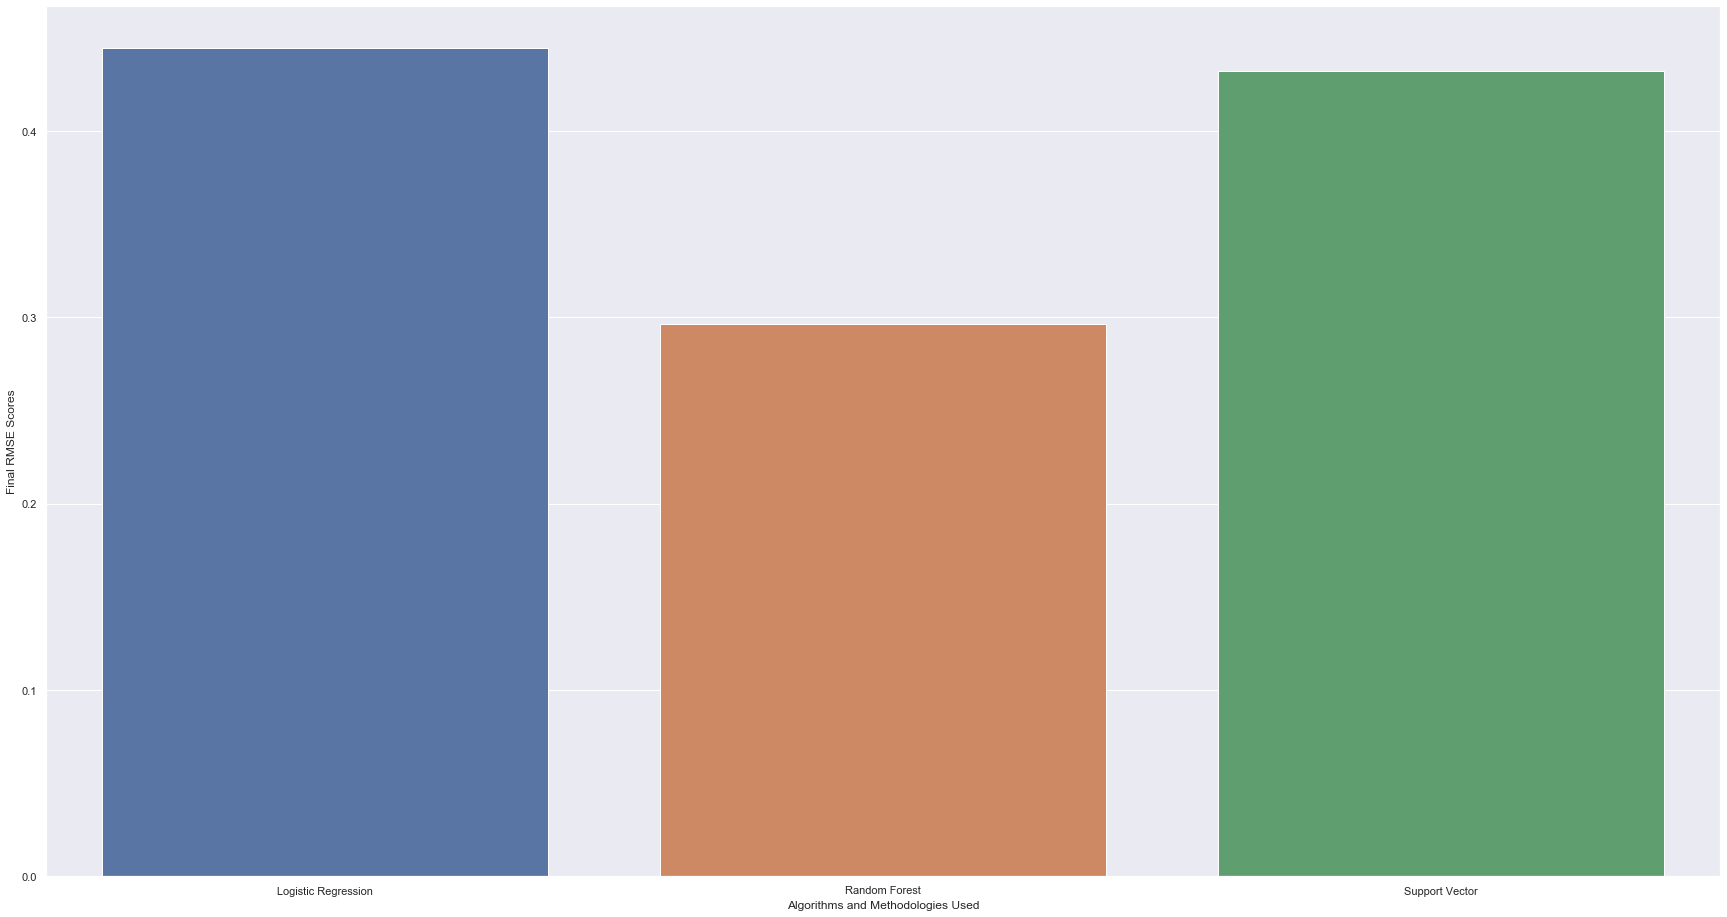

In [55]:
#Calculating Root-Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_pred_lr = logistic_regression.predict(X_test)
Y_pred_rf = rf.predict(X_test)
Y_pred_svm=Support_Vector.predict(X_test)

rmse_lr = sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_svm= sqrt(mean_squared_error(Y_test, Y_pred_svm))
rmse_rf = sqrt(mean_squared_error(Y_test, Y_pred_rf))

rmse_scores=[rmse_lr,rmse_rf,rmse_svm]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final RMSE Scores")
sns.barplot(methods,rmse_scores)